In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from a CSV file
df = pd.read_csv('/content/EV Stats-1.csv')


In [17]:

# Exploratory Data Analysis
print("Data Summary:")
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Display the information about the dataset



Data Summary:
   Sl. No           State  \
0       1  Andhra Pradesh   
1       2           Assam   
2       3           Bihar   
3       4    Chhattisgarh   
4       5           Delhi   

   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  \
0                                                431                    
1                                                463                    
2                                                252                    
3                                                613                    
4                                               1395                    

   Two Wheelers (Category L2 (CMVR))  \
0                                692   
1                                138   
2                                430   
3                                382   
4                                251   

   Two Wheelers (Max power not exceeding 250 Watts)  \
0                                              4689   
1                    

In [18]:
# Segmentation Analysis
# Segmenting by state
state_counts = df['State'].value_counts()
print("Vehicle Counts by State:")
print(state_counts)



Vehicle Counts by State:
Andhra Pradesh               1
Meghalaya                    1
Dadra and Nagar Haveli       1
Chandigarh                   1
Andaman & Nicobar islands    1
West Bengal                  1
Uttarkhand                   1
Uttar Pradesh                1
Tripura                      1
Telangana                    1
Tamil Nadu                   1
Rajasthan                    1
Punjab                       1
Odisha                       1
Nagaland                     1
Manipur                      1
Assam                        1
Maharashtra                  1
Madhya Pradesh               1
Kerala                       1
Karnataka                    1
Jharkhand                    1
Jammu & Kashmir              1
Himachal Pradesh             1
Haryana                      1
Gujarat                      1
Goa                          1
Delhi                        1
Chhattisgarh                 1
Bihar                        1
Total                        1
Name: State, d

In [19]:
# Segmenting by vehicle category
two_wheelers_counts = df['Two Wheelers (Category L2 (CMVR))'].sum()
three_wheelers_counts = df['Three Wheelers (Category L5 as per CMVR)'].sum()
passenger_cars_counts = df['Passenger Cars (Category M1 as per CMVR)'].sum()
buses_counts = df['Buses'].sum()

segment_counts = pd.Series([two_wheelers_counts, three_wheelers_counts, passenger_cars_counts, buses_counts],
                           index=['Two Wheelers', 'Three Wheelers', 'Passenger Cars', 'Buses'])

print("Vehicle Counts by Segment:")
print(segment_counts)



Vehicle Counts by Segment:
Two Wheelers       28138
Three Wheelers      1440
Passenger Cars    211142
Buses                 54
dtype: int64


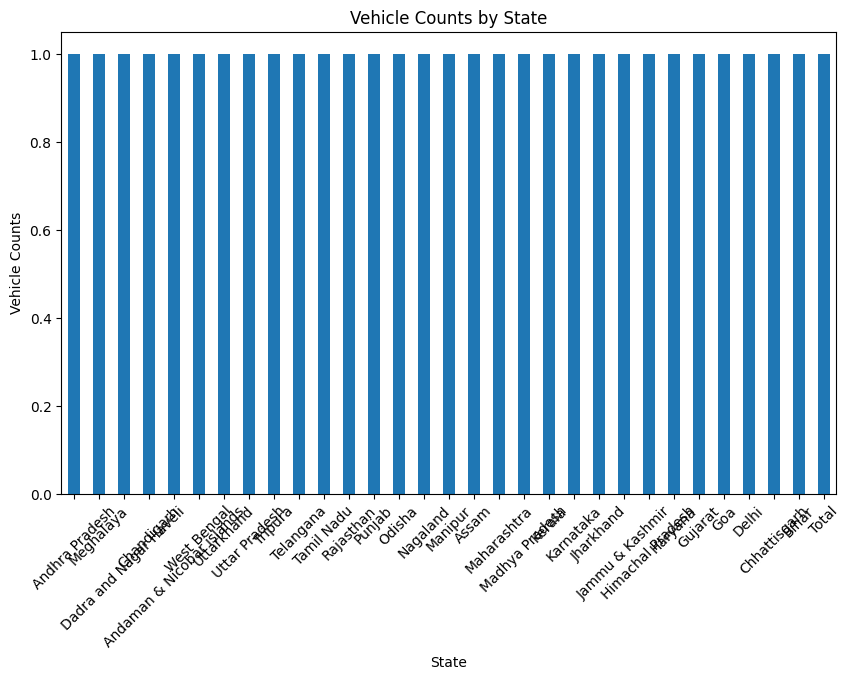

In [20]:
# Data Visualization
# Bar plot of vehicle counts by state
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Vehicle Counts')
plt.title('Vehicle Counts by State')
plt.xticks(rotation=45)
plt.show()



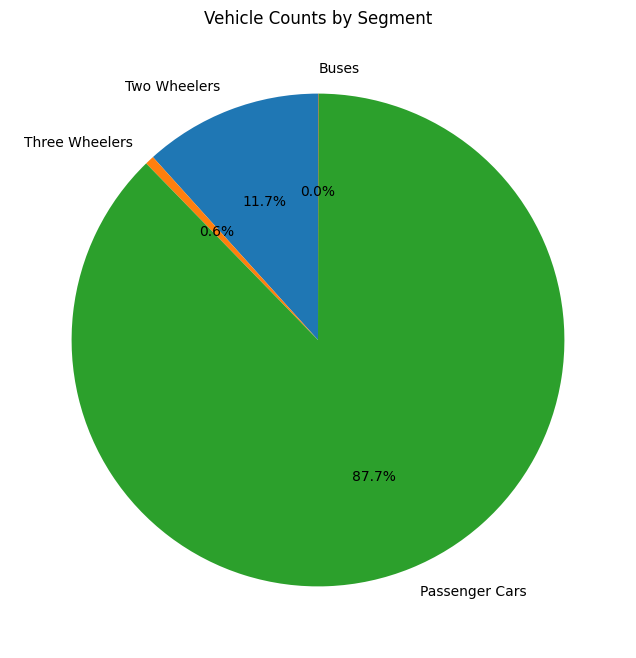

In [21]:
# Pie chart of vehicle counts by segment
plt.figure(figsize=(8, 8))
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Vehicle Counts by Segment')
plt.show()


In [22]:
# Filtering based on specific criteria
filtered_df = df[df['Passenger Cars (Category M1 as per CMVR)'] > 1000]
print("Filtered Dataset:")
print(filtered_df.head())

# Sorting the dataset by total vehicle count in descending order
sorted_df = df.sort_values(by='Total in state', ascending=False)
print("Sorted Dataset by Total Vehicle Count:")
print(sorted_df.head())


Filtered Dataset:
    Sl. No           State  \
0        1  Andhra Pradesh   
4        5           Delhi   
6        7         Gujarat   
7        8         Haryana   
11      12       Karnataka   

    Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  \
0                                                 431                    
4                                                1395                    
6                                                7182                    
7                                                3162                    
11                                                784                    

    Two Wheelers (Category L2 (CMVR))  \
0                                 692   
4                                 251   
6                                 217   
7                                1504   
11                               1104   

    Two Wheelers (Max power not exceeding 250 Watts)  \
0                                               4689 

In [23]:
# Grouping and calculating the sum of vehicle counts by state
state_vehicle_counts = df.groupby('State')['Total in state'].sum()
print("Vehicle Counts by State:")
print(state_vehicle_counts)

# Calculating the average number of vehicles per state
average_vehicle_count = df['Total in state'].mean()
print("Average Vehicle Count per State:", average_vehicle_count)


Vehicle Counts by State:
State
Andaman & Nicobar islands        82
Andhra Pradesh                 9492
Assam                          1875
Bihar                          3171
Chandigarh                     2500
Chhattisgarh                   4234
Dadra and Nagar Haveli          816
Delhi                         19381
Goa                             514
Gujarat                       31267
Haryana                       23589
Himachal Pradesh                 98
Jammu & Kashmir                 438
Jharkhand                      1710
Karnataka                     13386
Kerala                        11202
Madhya Pradesh                 6461
Maharashtra                   34013
Manipur                          52
Meghalaya                         6
Nagaland                         24
Odisha                         3863
Punjab                         6538
Rajasthan                     15763
Tamil Nadu                    16746
Telangana                      9034
Total                        2608

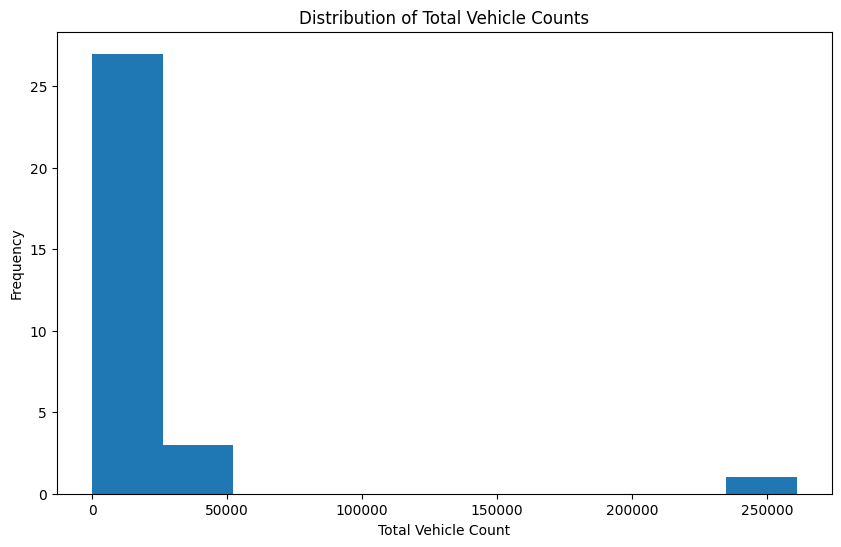

In [24]:
# Histogram of total vehicle counts
plt.figure(figsize=(10, 6))
plt.hist(df['Total in state'], bins=10)
plt.xlabel('Total Vehicle Count')
plt.ylabel('Frequency')
plt.title('Distribution of Total Vehicle Counts')
plt.show()



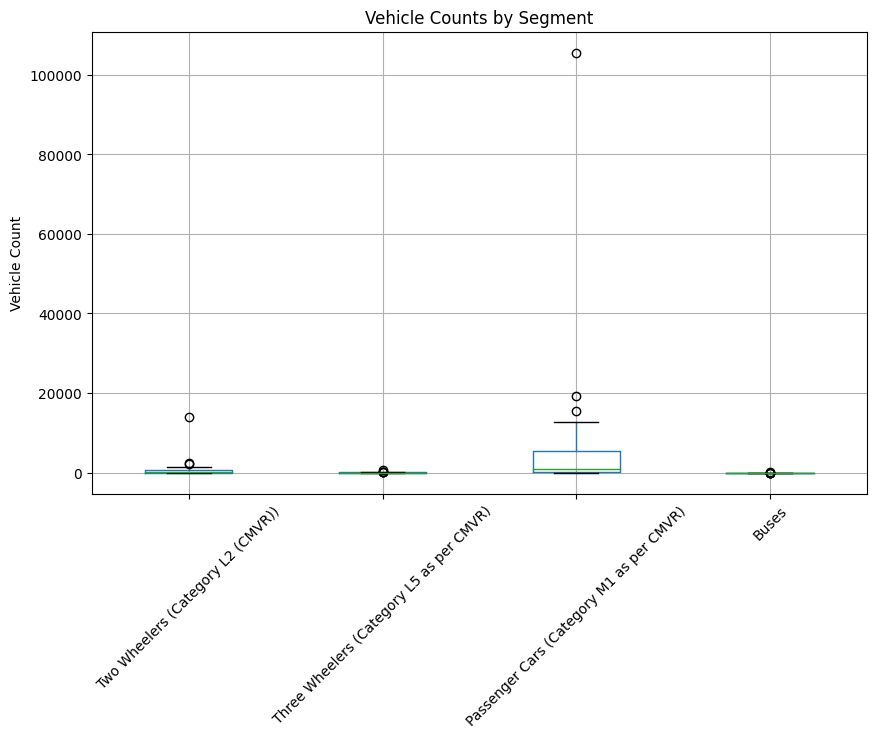

In [25]:
# Box plot of vehicle counts by segment
plt.figure(figsize=(10, 6))
df.boxplot(column=['Two Wheelers (Category L2 (CMVR))', 'Three Wheelers (Category L5 as per CMVR)',
                   'Passenger Cars (Category M1 as per CMVR)', 'Buses'])
plt.ylabel('Vehicle Count')
plt.title('Vehicle Counts by Segment')
plt.xticks(rotation=45)
plt.show()


In [26]:
import seaborn as sns

<ipython-input-27-5705f5443a6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


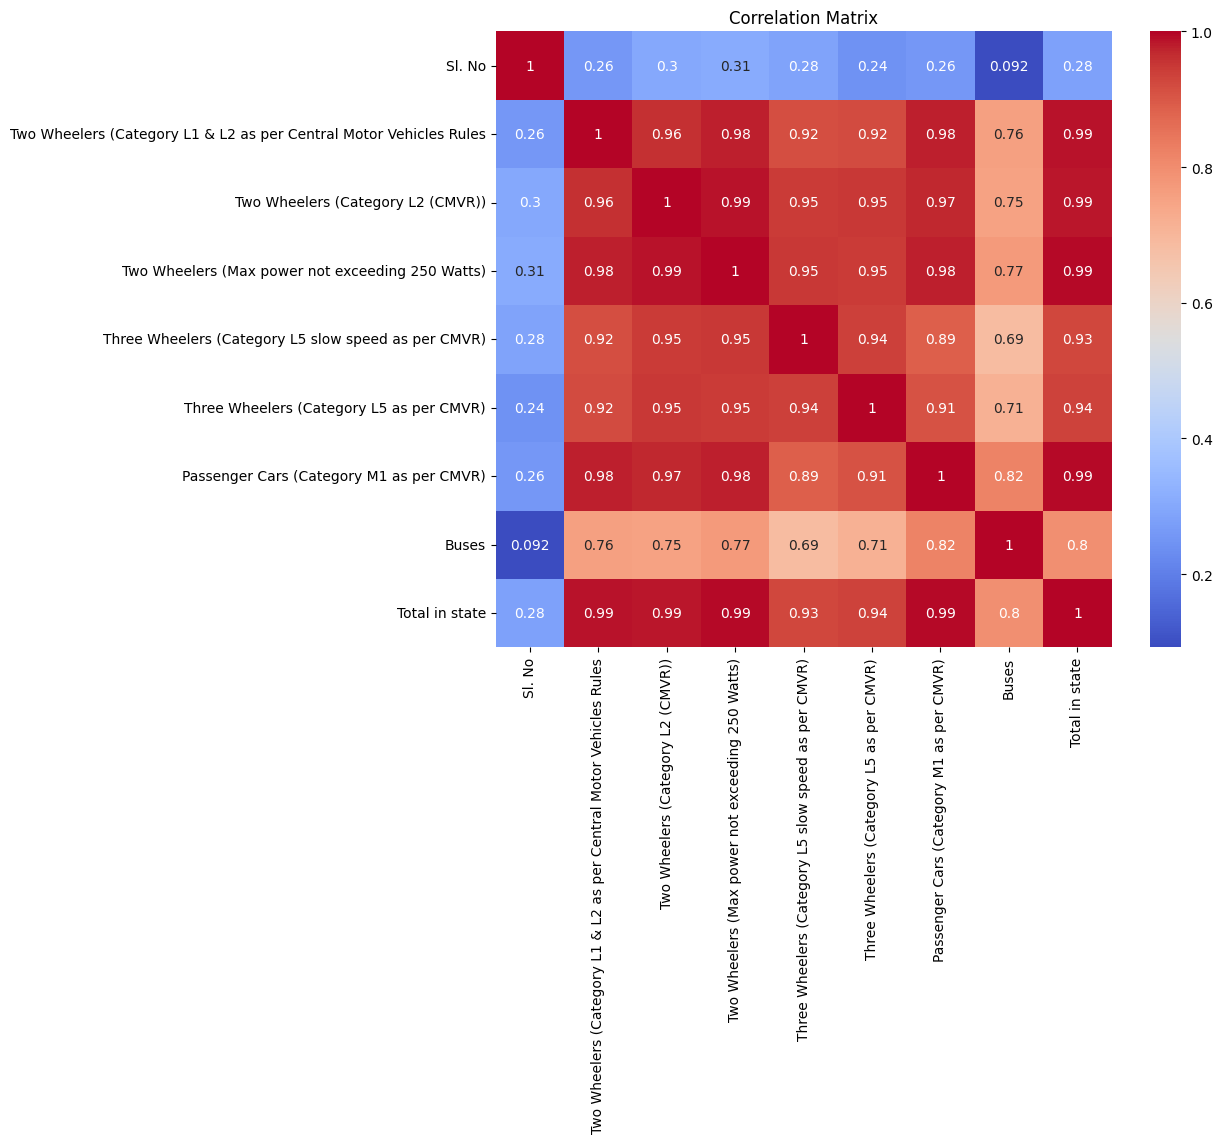

In [27]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [28]:
# Generate a statistical summary of the dataset
summary = df.describe()
print(summary)


          Sl. No  \
count  31.000000   
mean   16.000000   
std     9.092121   
min     1.000000   
25%     8.500000   
50%    16.000000   
75%    23.500000   
max    31.000000   

       Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  \
count                                          31.000000                    
mean                                         1777.354839                    
std                                          5000.160994                    
min                                             0.000000                    
25%                                            22.000000                    
50%                                           463.000000                    
75%                                          1089.500000                    
max                                         27549.000000                    

       Two Wheelers (Category L2 (CMVR))  \
count                          31.000000   
mean                          907.677

## **CONCLUSION**

In conclusion, the Electric Vehicles in India dataset provides information on the vehicle counts based on different categories and segments in various states of India. Through data analysis and segmentation, we can gain insights into the distribution of electric vehicles in the country.

By analyzing the dataset, we can:

Determine the total number of electric vehicles in each state, which helps identify the regions with higher adoption rates.
Segment the vehicles by category (two-wheelers, three-wheelers, passenger cars, and buses) to understand the distribution of electric vehicles across different vehicle types.
Visualize the data through bar plots, pie charts, histograms, and box plots to gain a better understanding of the distribution and characteristics of electric vehicles in India.
These analysis techniques provide a foundation for understanding the current state of electric vehicle adoption in India and can assist in identifying trends and patterns within the dataset. Keep in mind that the conclusions drawn from the analysis may be subject to the quality and representativeness of the dataset.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [30]:
# Select the relevant columns for modeling
X = df[['Two Wheelers (Category L2 (CMVR))', 'Three Wheelers (Category L5 as per CMVR)',
        'Passenger Cars (Category M1 as per CMVR)', 'Buses']]
y = df['Total in state']



In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [32]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Model Evaluation:
Mean Squared Error: 106701.35500080697
R-squared: -0.43015578935608145
